__Realism and Complexity__

Up to now, we've fitted some fairly crude and unrealistic lens models. For example, we've modeled the lens galaxy's mass as a sphere. Given most lens galaxies are literally called 'elliptical' galaxies, we should probably model their mass as elliptical! We have completely omitted the lens galaxy's light. So, in this example, we'll start using a more realistic lens model.

In my experience, the simplest lens model (e.g. that has the fewest parameters) that one can fit to a real strong lens and still get a reasonable fit is as follows:

1) An elliptical Sersic light-profile for the lens galaxy's light.

2) A singular isothermal ellipsoid (SIE) mass-profile for the lens galaxy's mass.

3) An elliptical exponential light-profile for the source galaxy's light (to be honest, even this is a gross over-simplification, but lets worry about that later).

This has a total of 18 non-linear parameters, which is over double the number of parameters we've fitted up to now. In future exercises, we'll fit even more complex models, with some 20-30+ non-linear parameters.

The goal of this, rather short, exercise, is to fit this 'realistic' model to a simulated image, where the lens's light is visible and mass is elliptical. What could go wrong?

In [1]:
%matplotlib inline

from autofit import conf
from autofit.optimize import non_linear as nl
from autolens.pipeline import phase as ph
from autolens.data import ccd
from autolens.data.array import mask as msk
from autolens.lens import ray_tracing
from autolens.lens import lens_fit
from autolens.model.galaxy import galaxy as g
from autolens.model.galaxy import galaxy_model as gm
from autolens.lens import lens_data as li
from autolens.model.profiles import light_profiles as lp
from autolens.model.profiles import mass_profiles as mp
from autolens.data.plotters import ccd_plotters
from autolens.lens.plotters import lens_fit_plotters

In [2]:
# You need to change the path below to the chapter 1 directory.
chapter_path = '/path/to/user/autolens_workspace/howtolens/chapter_2_lens_modeling/'

# This sets up the config files used by this tutorial, and the path where the output of the modeling is placed.
conf.instance = conf.Config(config_path=chapter_path+'configs/3_realism_and_complexity', output_path=chapter_path+"output")

Another simulate image function, albeit it generates a new image

In [3]:
def simulate():

    from autolens.data.array import grids
    from autolens.model.galaxy import galaxy as g
    from autolens.lens import ray_tracing

    psf = ccd.PSF.simulate_as_gaussian(shape=(11, 11), sigma=0.05, pixel_scale=0.05)
    image_plane_grid_stack = grids.GridStack.grid_stack_for_simulation(shape=(130, 130), pixel_scale=0.1, psf_shape=(11, 11))

    lens_galaxy = g.Galaxy(redshift=0.5, 
                           light=lp.EllipticalSersic(centre=(0.0, 0.0), axis_ratio=0.9, phi=45.0, intensity=0.04,
                                                             effective_radius=0.5, sersic_index=3.5),
                           mass=mp.EllipticalIsothermal(centre=(0.0, 0.0), axis_ratio=0.8, phi=45.0, einstein_radius=0.8))

    source_galaxy = g.Galaxy(redshift=1.0, 
                             light=lp.EllipticalSersic(centre=(0.0, 0.0), axis_ratio=0.5, phi=90.0, intensity=0.03,
                                                       effective_radius=0.3, sersic_index=3.0))
    
    tracer = ray_tracing.TracerImageSourcePlanes(lens_galaxies=[lens_galaxy], source_galaxies=[source_galaxy],
                                                 image_plane_grid_stack=image_plane_grid_stack)

    ccd_simulated = ccd.CCDData.simulate(array=tracer.image_plane_image_for_simulation, pixel_scale=0.1,
                                                   exposure_time=300.0, psf=psf, background_sky_level=0.1, add_noise=True)

    return ccd_simulated

Simulate the image and set it up.

In [4]:
ccd_data = simulate()

When we plot it, the lens light's is clealy visible in the centre of the image

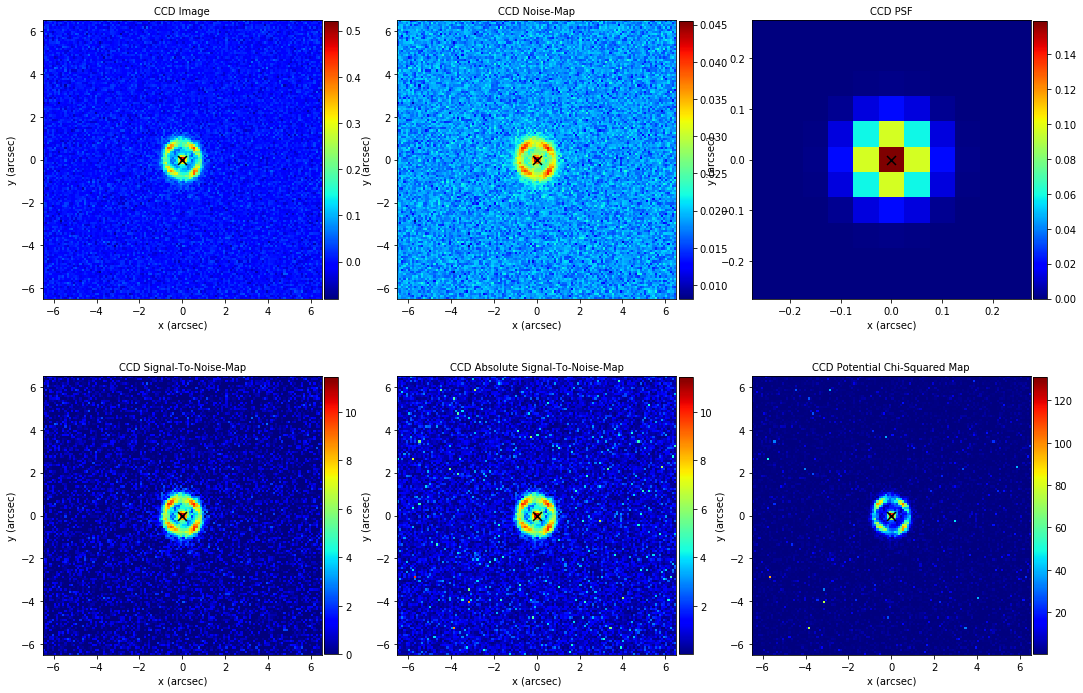

In [5]:
ccd_plotters.plot_ccd_subplot(ccd_data=ccd_data)

Now lets fit it using a phase, noting that indeed the galaxy-model corresponds to the one above.

Because we now have 18 non-linear parameters, the non-linear search takes a lot longer to run. On my laptop, this phase took around an hour, which is a bit too long for you to wait if you want to go through these tutorials quickly. Therefore, as discussed before, I've included the results of this non-linear search already, allowing you to go through the tutorial as if you had actually run them.

Nevertheless, you could try running it yourself (maybe over your lunch break?). All you need to do is change the phase_name below, maybe to something like 'howtolens/3_realism_and_complexity_rerun'

In [6]:
phase = ph.LensSourcePlanePhase(
    phase_name='3_realism_and_complexity', 
    lens_galaxies=dict(lens_galaxy=gm.GalaxyModel(redshift=0.5, light=lp.EllipticalSersic, mass=mp.EllipticalIsothermal)),
    source_galaxies=dict(source_galaxy=gm.GalaxyModel(redshift=1.0, light=lp.EllipticalExponential)),
    optimizer_class=nl.MultiNest)


Lets run the phase.

In [7]:
print('MultiNest has begun running - checkout the workspace/howtolens/chapter_2_lens_modeling/output/3_realism_and_complexity'
      'folder for live output of the results, images and lens model.'
      'This Jupyter notebook cell with progress once MultiNest has completed - this could take some time!')
results = phase.run(data=ccd_data)
print('MultiNest has finished run - you may now continue the notebook.')

MultiNest has begun running - checkout the workspace/howtolens/chapter_2_lens_modeling/output/3_realism_and_complexityfolder for live output of the results, images and lens model.This Jupyter notebook cell with progress once MultiNest has completed - this could take some time!


/home/jammy/PycharmProjects/VirtualEnvs/PyAutoLens/lib/python3.6/site-packages/getdist/chains.py:1022: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  weights = np.hstack((chain.weights for chain in self.chains))
/home/jammy/PycharmProjects/VirtualEnvs/PyAutoLens/lib/python3.6/site-packages/getdist/chains.py:1023: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  loglikes = np.hstack((chain.loglikes for chain in self.chains))
/home/jammy/PycharmProjects/VirtualEnvs/PyAutoLens/lib/python3.6/site-packages/getdist/chains.py:1024: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as 

/home/jammy/PycharmProjects/PyAutoLens/workspace/howtolens/chapter_2_lens_modeling/output//3_realism_and_complexity_sub_2/optimizer/multinest.txt
Removed no burn in


MultiNest has finished run - you may now continue the notebook.


And lets look at the image.

In [9]:
lens_fit_plotters.plot_fit_subplot(fit=results.most_likely_fit, should_plot_mask=True, extract_array_from_mask=True, 
                                   zoom_around_mask=True)

Uh-oh. That image didn't look very good, did it? If we compare our inferred parameters (look at the 'workspace/howtolens/chapter_2_lens_modeling/output/3_realism_and_complexity' folder to the actual values (in the simulate function) you'll see that we have, indeed, fitted the wrong model.

Yep, we've inferred the wrong lens model. Or have we? Maybe you're thinking that this model provides an even higher likelihood than the correct solution? Lets make absolutely sure it doesnt: (you've seen all this code below before, but I've put a few comments to remind you of whats happening)

Create a lens data-set to make the fit - the mask we used above was a 3" circle (we'll come back to this later)

In [ ]:
mask = msk.Mask.circular(shape=ccd_data.shape, pixel_scale=ccd_data.pixel_scale, radius_arcsec=3.0)
lens_data= li.LensData(ccd_data=ccd_data, mask=mask)
ccd_plotters.plot_image(ccd_data=ccd_data, mask=mask, extract_array_from_mask=True, zoom_around_mask=True)

Make the tracer we use to simulate the image

In [ ]:
lens_galaxy = g.Galaxy(redshift=0.5, 
                       light=lp.EllipticalSersic(centre=(0.0, 0.0), axis_ratio=0.9, phi=45.0, intensity=0.04,
                                                 effective_radius=0.5, sersic_index=3.5),
                       mass=mp.EllipticalIsothermal(centre=(0.0, 0.0), axis_ratio=0.8, phi=45.0, einstein_radius=0.8))

source_galaxy = g.Galaxy(redshift=1.0, 
                         light=lp.EllipticalSersic(centre=(0.0, 0.0), axis_ratio=0.5, phi=90.0, intensity=0.03,
                                                   effective_radius=0.3, sersic_index=3.0))

tracer = ray_tracing.TracerImageSourcePlanes(lens_galaxies=[lens_galaxy], source_galaxies=[source_galaxy],
                                             image_plane_grid_stack=lens_data.grid_stack)


Now, lets fit the lensing image with the tracer and plot the fit. It looks a lot better than above, doesn't it?

In [ ]:
correct_fit = lens_fit.LensDataFit.for_data_and_tracer(lens_data=lens_data, tracer=tracer)
lens_fit_plotters.plot_fit_subplot(fit=correct_fit, should_plot_mask=True, extract_array_from_mask=True, zoom_around_mask=True)

Finally, just to be sure, lets compare the two likelihoods

In [ ]:
print('Likelihood of Non-linear Search:')
print(results.most_likely_fit.likelihood)
print('Likelihood of Correct Model:')
print(correct_fit.likelihood)

Well, there we have it, the input model has a much higher likelihood than the one our non-linear search inferred.

Clearly, our non-linear search failed. So, what happened? Where did it all go wrong?

I want you to think about 'complexity'. As we made our lens model more realistic, we also made it more complex. Our non-linear parameter space went from 7 dimensions to 18. This means there was a much larger 'volume' of parameter space to search. Maybe, therefore, our non-linear search got lost. It found some region of parameter space that it thought was the highest likelihood region and focused the rest of its search there. But it was mistaken, there was infact another region of parameter space with even higher likelihood solutions.

This region - the one our non-linear search failed to locate - is called the global maximum likelihood region. At its core, lens modeling is all about learning how to get a non-linear search to find this region of parameter space, even when the lens model is extremely complex.

If you did run the phase above yourself, you might of actually inferred the correct lens model. There is some level of randomness in a non-linear search. This means that sometimes, it might get infer a locally maximal likelihood, and other times find the global maxima another. Nevertheless, as lens models become more complex, you'll quickly find yourself stuck within only in local maxima, unless you learn how to navigate parameter space better.

And with that, we're done. In the next exercise, we'll learn how to deal with our failures and begin thinking about how we can ensure our non-linear search finds the global-maximum likelihood solution. Before that, think about the following:

1) When you look at an image of a strong lens, do you get a sense of roughly what values certain lens model parameters are?

2) The non-linear search failed because parameter space was too complex. Could we make it less complex, whilst still keeping our lens model fairly realistic?

3) The source galaxy in this example had only 6 non-linear parameters. Real source galaxies may have multiple components (e.g. a bar, disk, bulge, star-forming knot) and there may even be more than 1 source galaxy! Do you think there is any hope of us navigating a parameter space if the source contributes 20+ parameters by itself?